In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=True, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


 deer plane  bird  deer


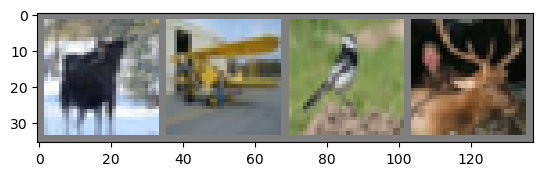

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


dataiter = iter(trainloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))

print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [64]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3)
        self.batch_norm1 = nn.BatchNorm2d(16)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.batch_norm2 = nn.BatchNorm2d(32)
        self.fc1 = nn.Linear(32 * 5 * 5, 500)
        self.fc2 = nn.Linear(500, 200)
        self.fc3 = nn.Linear(200, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.batch_norm1(self.conv1(x))))
        x = self.pool(F.relu(self.batch_norm2(self.conv2(x))))
        x = x.view(-1, 32 * 5 * 5)
        x = F.sigmoid(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)

net = Net()

In [65]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [69]:
num_epochs = 5

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
        if i % 100 == 0:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print('Finished Training')

[1,     1] loss: 0.014
[1,   101] loss: 1.127
[1,   201] loss: 1.104
[1,   301] loss: 1.241
[1,   401] loss: 1.258
[1,   501] loss: 1.176
[1,   601] loss: 1.126
[1,   701] loss: 1.241
[1,   801] loss: 1.160
[1,   901] loss: 1.172
[1,  1001] loss: 1.158
[1,  1101] loss: 1.207
[1,  1201] loss: 1.145
[1,  1301] loss: 1.275
[1,  1401] loss: 1.068
[1,  1501] loss: 1.236
[1,  1601] loss: 1.139
[1,  1701] loss: 1.181
[1,  1801] loss: 1.164
[1,  1901] loss: 1.153
[1,  2001] loss: 1.115
[1,  2101] loss: 1.220
[1,  2201] loss: 1.256
[1,  2301] loss: 1.143
[1,  2401] loss: 1.189
[1,  2501] loss: 1.086
[1,  2601] loss: 1.201
[1,  2701] loss: 1.175
[1,  2801] loss: 1.149
[1,  2901] loss: 1.193
[1,  3001] loss: 1.054
[1,  3101] loss: 1.144
[1,  3201] loss: 1.273
[1,  3301] loss: 1.113
[1,  3401] loss: 1.133
[1,  3501] loss: 1.151
[1,  3601] loss: 1.144
[1,  3701] loss: 1.076
[1,  3801] loss: 1.141
[1,  3901] loss: 1.045
[1,  4001] loss: 1.145
[1,  4101] loss: 1.202
[1,  4201] loss: 1.150
[1,  4301] 

GroundTruth:   ship horse   dog  deer


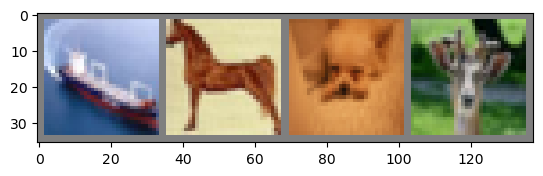

In [68]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [9]:
outputs = net(images)

In [67]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:   deer   car truck   dog
